# ERA5 plots and animatinos

In [1]:
# Convenient jupyter setup
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

In [6]:
import xarray as xr
from sithom.plot import plot_defaults
from sithom.xr import plot_units, mon_increase
from src.constants import KATRINA_ERA5_NC, ECMWF_AIR_VAR, ECMWF_WATER_VAR

plot_defaults()

In [4]:
ds = xr.open_dataset(KATRINA_ERA5_NC)

/Users/simon/new-orleans/env/lib/python3.8/site-packages/xarray/backends/plugins.py:61: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [8]:
improved_ds = mon_increase(plot_units(ds))

In [9]:
improved_ds

<xarray.Dataset>
Dimensions:    (latitude: 81, longitude: 81, time: 408)
Coordinates:
  * latitude   (latitude) float32 15.0 15.25 15.5 15.75 ... 34.5 34.75 35.0
  * longitude  (longitude) float32 -100.0 -99.75 -99.5 ... -80.5 -80.25 -80.0
  * time       (time) datetime64[ns] 2005-08-20 ... 2005-09-05T23:00:00
Data variables:
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
    d2m        (time, latitude, longitude) float32 ...
    t2m        (time, latitude, longitude) float32 ...
    msl        (time, latitude, longitude) float32 ...
    sp         (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-08-09 13:11:19 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [10]:
from src.preprocessing.sel import mid_katrina

In [12]:
kat_ds = mid_katrina(improved_ds)

In [13]:
kat_ds

<xarray.Dataset>
Dimensions:    (latitude: 10, longitude: 23)
Coordinates:
  * latitude   (latitude) float32 28.5 28.75 29.0 29.25 ... 30.25 30.5 30.75
  * longitude  (longitude) float32 -92.0 -91.75 -91.5 ... -87.0 -86.75 -86.5
    time       datetime64[ns] 2005-08-29T10:00:00
Data variables:
    u10        (latitude, longitude) float32 ...
    v10        (latitude, longitude) float32 ...
    d2m        (latitude, longitude) float32 ...
    t2m        (latitude, longitude) float32 ...
    msl        (latitude, longitude) float32 ...
    sp         (latitude, longitude) float32 ...
    tp         (latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-08-09 13:11:19 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [32]:
import numpy as np
panel_array = np.array([["u10", "v10"], ["d2m", "t2m"], ["msl", "sp"], ["tp", None]])

In [33]:
panel_array.shape

(4, 2)

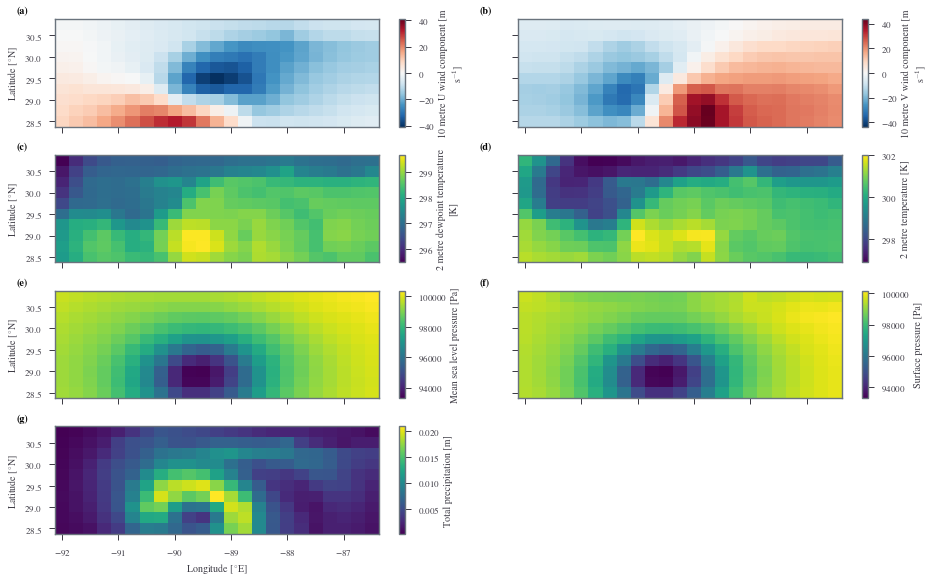

In [52]:
import matplotlib.pyplot as plt
from sithom.plot import label_subplots, set_dim
fig, axs = plt.subplots(panel_array.shape[0], panel_array.shape[1], sharex=True, sharey=True)

label_subplots(axs, override="outside")
num = len(axs.ravel())
for i in range(num):
    var = panel_array.ravel()[i]
    ax = axs.ravel()[i]
    if var is not None:
        kat_ds[panel_array.ravel()[i]].plot(ax=ax)
        ax.set_title("")
        if i % 2:
            ax.set_ylabel("")
        if i < num - 2:
            ax.set_xlabel("")
    else:
        ax.remove()
        
        
set_dim(fig, fraction_of_line_width=2.4)


In [50]:
from sithom.plot import label_subplots, set_dim
set_dim?

(4, 2)

ds.swh.sel(time="2005-08-2T01:00:00").plot()
ds.tp.sel(time="2005-08-2T01:00:00").plot()

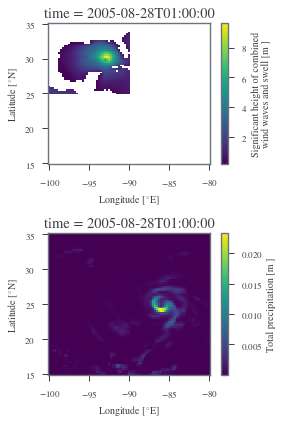

In [4]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 1, figsize=(4, 6))
ds.swh.sel(time="2005-08-28T01:00:00").plot(ax=axs[0])
ds.tp.sel(time="2005-08-28T01:00:00").plot(ax=axs[1])
plt.tight_layout()

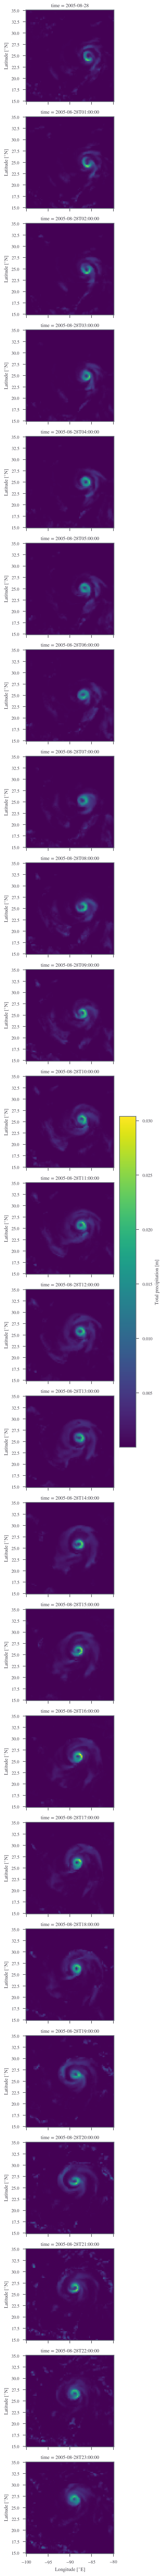

In [25]:
ds.tp.sel(time="2005-08-28").plot(row="time")

In [26]:
ds.swh.sel(time="2005-08-2").plot(row="time")

KeyError: '2005-08-2'

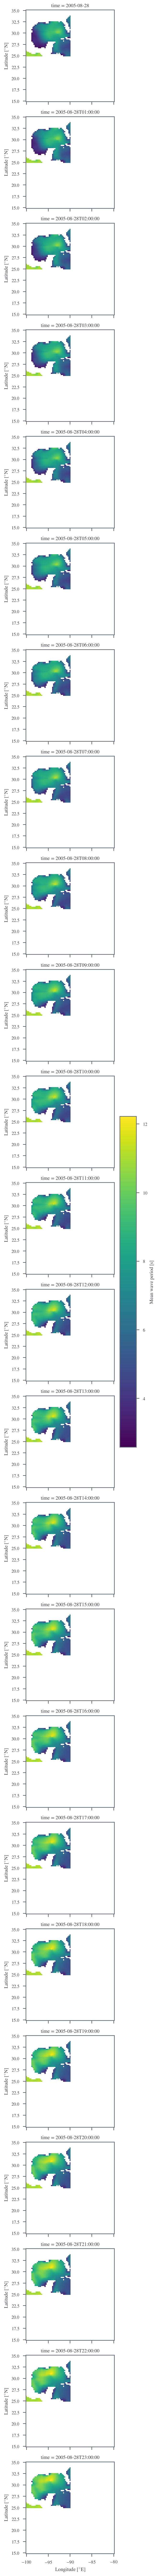

In [27]:
ds.mwp.sel(time="2005-08-28").plot(row="time")